# PoG - Computer Assignment 2021
### Building a Spectral Energy Distribution for a galaxy at different redshifts


In [25]:
#import modules
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.pyplot import figure, show, xlim, ylim
from scipy.integrate import simps
from scipy.interpolate import interp1d

### Step 1

In [26]:
#galaxy template
stelmass0 = 10**9 #Msol
galage0 = 0.05e9 #Gyr
logage = np.log10(galage0)
print(logage)

7.698970004336019


### Step 2

In [27]:
data4color = np.genfromtxt('Template11.txt', unpack=True) #extract data from 4color as txt file
row = np.where(data4color[0]==7.698970) #find index row where age is equal to template
i = row[0][0] #get integer from that row
Mtemp = data4color[10,i] #total stellar mass of template in normalised solar masses
print("stellar mass of template galaxy:", Mtemp)

stellar mass of template galaxy: 0.080513


In [28]:
data_age_extr = np.genfromtxt('Template11age_extr.txt', unpack=True) #extract data from age.extr as txt file
Lumtemp = data_age_extr[1] #extract luminosity
wavel = data_age_extr[0]
Mpet = 5e8 #stellar mass pet galaxy in solar masses
Lumnorm = Lumtemp/Mtemp*Mpet #normalise luminosites
print(Lumnorm)

[7.41060450e+04 8.47378684e+04 9.06064859e+04 ... 2.19020531e-02
 1.18092730e-02 6.91441134e-03]


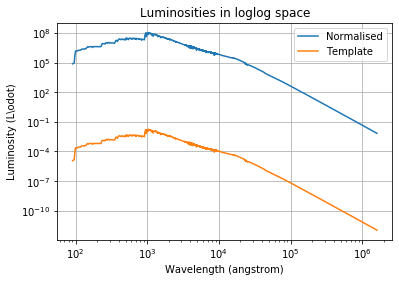

In [29]:
fig = figure()
frame = fig.add_subplot(1,1,1)
frame.loglog(wavel, Lumnorm, label = "Normalised")
frame.loglog(wavel, Lumtemp, label = "Template")
frame.set_xlabel('Wavelength (angstrom)')
frame.set_ylabel('Luminosity (L\odot)')
frame.set_title('Luminosities in loglog space')
frame.grid()
frame.legend()
show()

### Step 3

In [30]:
#import transmission curves for the Hubble Space Telescope svo2.cab.inta-csic.es/theory/fps
curve_F775W = np.loadtxt("HST_ACS_WFC.F775W.dat")
curve_F160W = np.loadtxt("HST_WFC3_IR.F160W.dat")
wavel_F775W = curve_F775W[:,0] #wavelengths
trans_F775W = curve_F775W[:,1] #transmission
wavel_F160W = curve_F160W[:,0]
trans_F160W = curve_F160W[:,1]

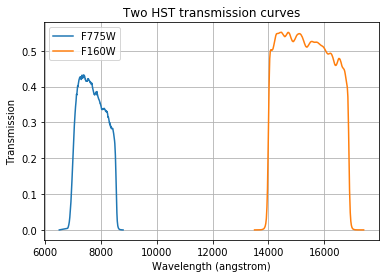

In [31]:
#transmission curves
fig = figure()
frame = fig.add_subplot(1,1,1)
frame.plot(wavel_F775W, trans_F775W, label = "F775W")
frame.plot(wavel_F160W, trans_F160W, label = "F160W")
frame.set_xlabel('Wavelength (angstrom)')
frame.set_ylabel('Transmission')
frame.set_title('Two HST transmission curves')
frame.grid()
frame.legend()
show()

### Step 4
  
Redshift of pet galaxy:  
Assuming $H_0 = 70$ km/s/Mpc
$v = H_0d$  
$v = c\cdot z$  
so  $z = \frac{H_0d}{c} = \frac{70 \cdot 3.8}{3\cdot10^5} = 8.9 \cdot 10^{-4}$


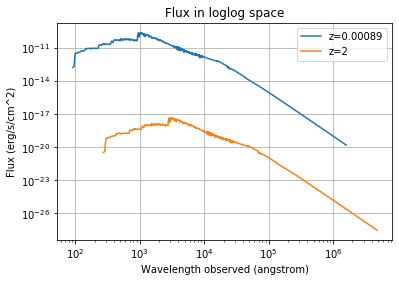

In [32]:
#4a
dL1 = 3.8 #Mpc, luminosity distance pet galaxy
dL1 *= 3.085677581e24 #cm
z1 = 8.9e-4   #redshift pet galaxy
dL2 = 15537.2 #Mpc
dL2 *= 3.085677581e24 #cm
z2 = 2

Lsol = 3.826e33  #solar luminosity
#calculate flux by rewriting equation 1
flux1 = Lumnorm/((1+z1)*4*np.pi*dL1**2)*Lsol
flux2 = Lumnorm/((1+z2)*4*np.pi*dL2**2)*Lsol
wavelobs1 = wavel*(1+z1) #obtain observed wavelength from wavelength in restframe
wavelobs2 = wavel*(1+z2)

fig = figure()
frame = fig.add_subplot(1,1,1)
frame.loglog(wavelobs1, flux1, label = f'z={z1}')
frame.loglog(wavelobs2, flux2, label = "z=2")
frame.set_xlabel('Wavelength observed (angstrom)')
frame.set_ylabel('Flux (erg/s/cm^2)')
frame.set_title('Flux in loglog space')
frame.grid()
frame.legend()
show()

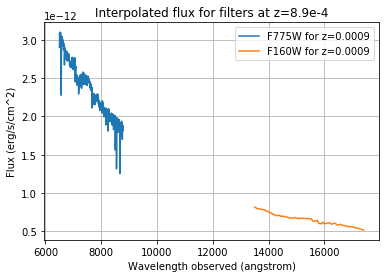

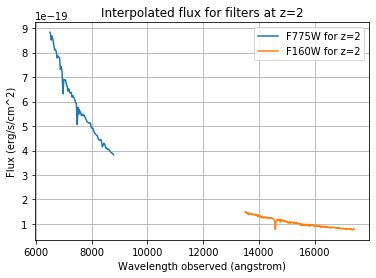

In [33]:
#interpolate flux from template so any wavelength can be used
finterp1 = interp1d(wavelobs1, flux1)
finterp2 = interp1d(wavelobs2, flux2)

# fluxes at wavelengths of transmission curve data
f1_F775W = finterp1(wavel_F775W)  
f2_F775W = finterp2(wavel_F775W)
f1_F160W = finterp1(wavel_F160W)
f2_F160W = finterp2(wavel_F160W)

fig = figure()
frame = fig.add_subplot(1,1,1)
frame.plot(wavel_F775W, f1_F775W, label = f'F775W for z={z1:.4f}')
#frame.plot(wavel_F775W, f2_F775W, label = f'F775W for z=2')
frame.plot(wavel_F160W, f1_F160W, label = f'F160W for z={z1:.4f}')
#frame.plot(wavel_F160W, f2_F160W, label = f'F160W for z=2')

frame.set_xlabel('Wavelength observed (angstrom)')
frame.set_ylabel('Flux (erg/s/cm^2)')
frame.set_title('Interpolated flux for filters at z=8.9e-4')
frame.grid()
frame.legend()
show()


fig = figure()
frame = fig.add_subplot(1,1,1)
#frame.plot(wavel_F775W, f1_F775W, label = f'F775W for z={z1:.4f}')
frame.plot(wavel_F775W, f2_F775W, label = f'F775W for z=2')
#frame.plot(wavel_F160W, f1_F160W, label = f'F160W for z={z1:.4f}')
frame.plot(wavel_F160W, f2_F160W, label = f'F160W for z=2')

frame.set_xlabel('Wavelength observed (angstrom)')
frame.set_ylabel('Flux (erg/s/cm^2)')
frame.set_title('Interpolated flux for filters at z=2')
frame.grid()
frame.legend()
show()

$f_\nu(\lambda_{eff}) = \frac{\int_0^\infty f_\nu(\lambda) T(\lambda)d\lambda}{\int_0^\infty T(\lambda)d\lambda}$   
$\lambda_{eff} = \frac{\int_0^\infty \lambda T(\lambda)d\lambda}{\int_0^\infty T(\lambda)d\lambda}$    
  
$f_\nu = f_\lambda \frac{d\lambda}{d\nu}=f_\lambda\frac{\lambda_{eff}^2}{c}$

$M_{AB}=-2.5\log_{10} \left(\frac{f_\nu}{3631 Jy} \right)$  
In cgs this is:  
$m_{AB}=-2.5\log_{10}f_\nu-48.60$



In [34]:
#using simspons rule to determine the convolution integrals
# flux densities f_lambda
convol1_F775W = simps(f1_F775W*trans_F775W, wavel_F775W)/simps(trans_F775W, wavel_F775W)
convol2_F775W = simps(f2_F775W*trans_F775W, wavel_F775W)/simps(trans_F775W, wavel_F775W)
convol1_F160W = simps(f1_F160W*trans_F160W, wavel_F160W)/simps(trans_F160W, wavel_F160W)
convol2_F160W = simps(f2_F160W*trans_F160W, wavel_F160W)/simps(trans_F160W, wavel_F160W)

# print(convol1_F775W)
# print(convol2_F775W)
# print(convol1_F160W)
# print(convol2_F160W)

#effective wavelenghts in cm
leff1_F775W = simps(wavel_F775W*trans_F775W, wavel_F775W)/simps(trans_F775W, wavel_F775W)*1e-8
leff2_F775W = simps(wavel_F775W*trans_F775W, wavel_F775W)/simps(trans_F775W, wavel_F775W)*1e-8
leff1_F160W = simps(wavel_F160W*trans_F160W, wavel_F160W)/simps(trans_F160W, wavel_F160W)*1e-8
leff2_F160W = simps(wavel_F160W*trans_F160W, wavel_F160W)/simps(trans_F160W, wavel_F160W)*1e-8

# print(leff1_F775W)
# print(leff2_F775W)
# print(leff1_F160W)
# print(leff2_F160W)

c = 3e10 #speed of ligh in cm/s
fluxnu1_F775W=convol1_F775W*leff1_F775W**2/c
fluxnu2_F775W=convol2_F775W*leff2_F775W**2/c
fluxnu1_F160W=convol1_F160W*leff1_F160W**2/c
fluxnu2_F160W=convol2_F160W*leff2_F160W**2/c

print(fluxnu1_F775W)

mAB1_F775W = -2.5*np.log10(fluxnu1_F775W) - 48.60

print(mAB1_F775W)

4.5481157939534745e-31
27.255421217021627


In [35]:
def flux_magnitude(wavelengths, trans_curve, flux):
    """ Calculate the convolution integral over flux in terms of wavelength
        Convert flux in terms of wavelength to flux in terms of frequency
        Determine magnitude in AB system
        Return flux in frequency and magnitude
    """
    intTrans = simps(trans_curve, wavelengths)
    # f_lambda
    convol = simps(flux*trans_curve, wavelengths)/intTrans  #convolution integral
    # effective wavelength
    Leff = simps(wavelengths*trans_curve, wavelengths)/intTrans*1e-8
    # f_nu
    c = 3e10 #speed of ligh in angstrom/s
    fluxnu1 = convol*Leff**2/c
    
    # magnitude in AB system
    mAB = -2.5*np.log10(fluxnu1) - 48.60
    print(mAB)
    return fluxnu1, mAB

fluxnu1_F775W, mAB1_F775W = flux_magnitude(wavel_F775W, trans_F775W, f1_F775W)
fluxnu2_F775W, mAB2_F775W = flux_magnitude(wavel_F775W, trans_F775W, f2_F775W)
fluxnu1_F160W, mAB1_F160W = flux_magnitude(wavel_F160W, trans_F160W, f1_F160W)
fluxnu2_F160W, mAB2_F160W = flux_magnitude(wavel_F160W, trans_F160W, f2_F160W)

colour1 = mAB1_F775W - mAB1_F160W   #colour for redshift pet galaxy
colour2 = mAB2_F775W - mAB2_F160W   #colour for redshift z=2

print(colour1, colour2)

27.255421217021627
43.81263546831138
27.12387798999236
44.117336212167054
0.1315432270292689 -0.30470074385567614
